# The Sparks Foundation

## Task 1 : Prediction using Supervised ML

#### *By : Akhil Namboodiri*

In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
#Reading the dataset,creating a dataframe and displaying its first 5 records using head()

df=pd.read_csv("Task1.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Printing information of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
#Printing the columns in the dataset

df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
#Preparing the input features for the model

X=df["Hours"]
X.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [6]:
#Preparing the target/label for the model to predict

y=df["Scores"]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [7]:
X.shape

(25,)

In [8]:
#Converting the i/p and o/p features into arrays

X=X.values.reshape(25,1)
y=y.values

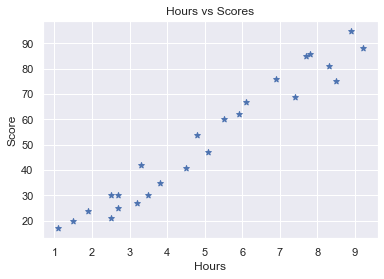

In [9]:
#Plotting the distribution of hours and scores

plt.scatter(X,y,marker='*')
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

In [10]:
#Splitting the data into training and testing set

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [11]:
#Training the data using LinearRegression algorithm

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
#Making predictions using the test data

y_pred=model.predict(X_test)
print(y_pred)

[27.01878177 78.84466226 39.97525189 75.85470762 56.91832821 49.94176737
 33.99534261 86.81787465]


In [13]:
#Creating a dataframe of the actual and predicted scores

df=pd.DataFrame({'Actual scores':y_test,'Predicted scores':y_pred})
df

,Actual scores,Predicted scores
0,30,27.018782
1,85,78.844662
2,35,39.975252
3,69,75.854708
4,60,56.918328
5,54,49.941767
6,27,33.995343
7,75,86.817875


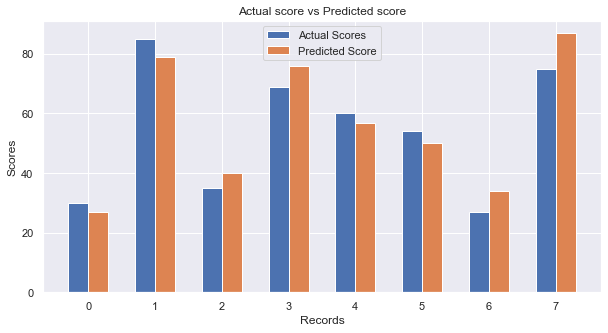

In [27]:
#Plotting the barplots for comparing the actual and the predicted score

N = len(df)

blue_bar = y_test
orange_bar = y_pred

ind = np.arange(N)
plt.figure(figsize=(10,5))
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Actual Scores')
plt.bar(ind + width, orange_bar, width, label='Predicted Score')

plt.xlabel('Records')
plt.ylabel('Scores')
plt.title('Actual score vs Predicted score')
plt.xticks(ind + width / 2, np.arange(0,8))

plt.legend(loc='best')
plt.show()

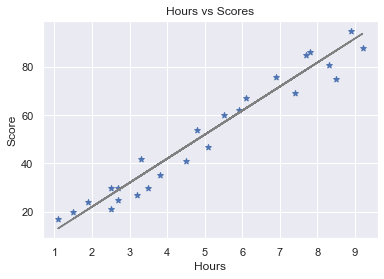

In [26]:
#Plotting the distribution for scores and hours for test data

line = model.coef_ * X + model.intercept_

plt.scatter(X, y,marker='*')
plt.plot(X, line,color='grey')
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Score')
plt.show()

In [15]:
#Passing the value as 9.25hrs to predict the score of that particular student

y_pred1=model.predict([[9.25]])

In [16]:
#Final Result after predicition

hours=9.25
print("No of Hours = {} hrs".format(hours))
print("Predicted Score = {} %".format(y_pred1[0]))

No of Hours = 9.25 hrs
Predicted Score = 94.29276125536512 %


### For a student studying for 9.25 hrs, the model predicted his/her Percentage Score = 93.02620255957635 %

In [17]:
#Calculating the performance of the model(evaluation)

from sklearn import metrics
from math import sqrt

print("Mean squared error is:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean absolute error is:",sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Mean absolute error is:",metrics.mean_absolute_error(y_test,y_pred))

Mean squared error is: 41.63486564552886
Root mean absolute error is: 6.452508476982333
Mean absolute error is: 5.864954643694258
